In [1]:
%matplotlib inline


# Animasi.py
Skrip ini mengilustrasikan konsep berikut:
   - Membuat animasi menggunakan matplotlib.FuncAnimation

Lihat URL berikut untuk melihat plot dan skrip NCL yang direproduksi:
    - Skrip NCL asli: https://www.ncl.ucar.edu/Applications/Scripts/animate_1.ncl
    - Plot NCL asli: https://www.ncl.ucar.edu/Applications/Images/animate_1_1_lg.png

Catatan:
    Mengeksekusi skrip ini tidak akan menamilkan gif, tetapi Anda memiliki opsi untuk menghapus komentar pada baris di bagian bawah yang akan menyimpan gif di direktori yang sama dengan skrip ini.


Mengimport paket:



In [2]:
import cartopy.crs as ccrs
import matplotlib.animation as animation
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

import geocat.datafiles as gdf
import geocat.viz as gv

Membaca data:



In [3]:
# Buka data file netCDF menggunakan mesin default xarray dan muat data ke dalam xarrays
# Nonaktifkan decoding waktu karena tidak ada metadata yang diperlukan
ds = xr.open_dataset(gdf.get("netcdf_files/meccatemp.cdf"), decode_times=False)

tas = ds.t

Membuat animasi:



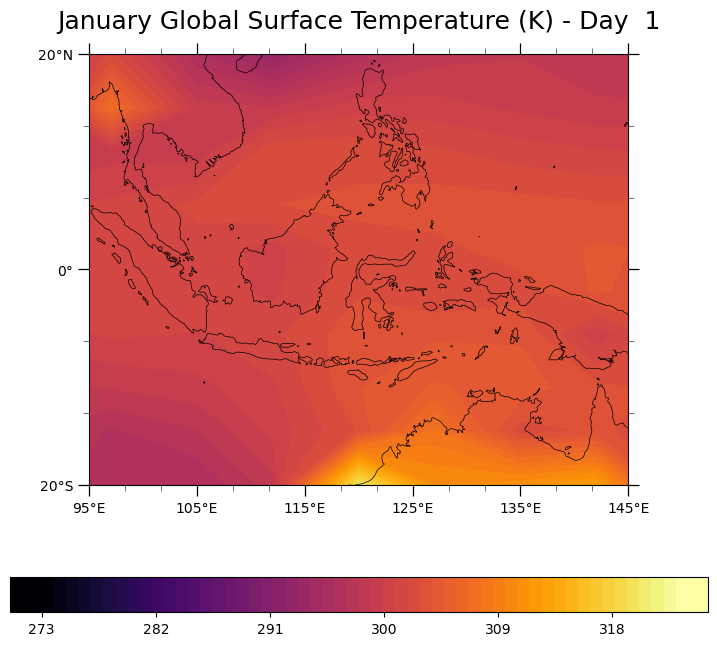

In [11]:
fig = plt.figure(figsize=(10, 8))
# Generate sumbu menggunakan Cartopy dan menggambar garis pantai
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidths=0.5)
ax.set_extent([95, 145, -20, 20], ccrs.PlateCarree())

# Gunakan fungsi geocat.viz.util untuk mengatur batas sumbu & nilai centang
gv.set_axes_limits_and_ticks(ax,
                             xlim=(95, 145),
                             ylim=(-20, 20),
                             xticks=np.linspace(95, 145, 6),
                             yticks=np.linspace(-20, 20, 3))

# Gunakan fungsi geocat.viz.util untuk menambahkan garis centang minor dan mayor
gv.add_major_minor_ticks(ax, labelsize=10)

# Gunakan fungsi geocat.viz.util untuk membuat label centang lintang bujur
gv.add_lat_lon_ticklabels(ax)

# Buat plot awal yang membuat colorbar
tas[0, :, :].plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           vmin=273,
                           vmax=323,
                           levels=53,
                           cmap="inferno",
                           cbar_kwargs={
                               "extendrect": True,
                               "orientation": "horizontal",
                               "ticks": np.arange(273, 323, 9),
                               "label": "",
                               "shrink": 0.90
                           })


# fungsi animasi untuk matplotlib FuncAnimation
def animate(i):
    tas[i, :, :].plot.contourf(
        ax=ax,
        transform=ccrs.PlateCarree(),
        vmin=273,
        vmax=323,
        levels=53,
        cmap="inferno",
        add_colorbar=False,
    )

    gv.set_titles_and_labels(
        ax,
        maintitle="January Global Surface Temperature (K) - Day  " +
        str(tas.coords['time'].values[i])[:13],
        xlabel="",
        ylabel="")


# menjalankan animasi yang diawali dengan frame dari init dan dilanjutkan dengan fungsi animasi
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

# Batalkan komentar pada baris ini untuk menyimpan animasi yang dibuat
anim.save('animate_1.gif', writer='pillow', fps=5)